In [1]:
import pandas as pd
import numpy as np

# 02. 数据的类型

## 2.1 数据的“味道”
在数据科学领域，理解不同`味道`的数据非常重要。数据类型不仅决定了分析方法和可得出的结论，而且也反映了现实世界中被测量对象的重要特征。

我们将研究以下 3 种最常见的分类方式：
+ 结构化数据(structured data)和非结构化数据(unstructured data)
+ 定量数据(quantitative data)和定性数据(qualitative data)
+ 数据的4个尺度

## 2.2 为什么要进行区分
假设我们正在研究某个国家的选举结果。在人口数据集中有一列叫`种族`，为了节 省存储空间，该列使用标识号代替种族信息。比如用数字`7`表示白人，用数字`2`代表黑人。如果分析师没有意识到`7`和`2`并不是传统意义上的数值，将在分析时犯下致命错误—根据`7`大于`2`，得出白人`大于`黑人的荒谬结论。

每当我们拿到一个数据集，总是迫不及待地进行数据探索，运用统计学模型，或者测试各种机器学习的算法，总是希望快速得到答案。然而，如果我们不了解分析对象的数据类型，很可能花费了巨大精力却错误地使用了一个并不适合该数据类型的模型。

因此， 我建议拿到新数据集后先用1小时左右对数据类型进行区分。

## 2.3 结构化数据和非结构化数据
判断方法如下：
+ 结构化数据(organized data)：指特征和观察值以表格形式存储(行列结构)
+ 非结构化数据(unorganized data)：指数据以自由实体形式存在，不符合任何标准的组织层次结构，比如行列结构

通常情况下，结构化数据最容易处理和分析。事实上，大部分统计学模型和机器学习模型都只适用于结构化数据，而不能很好地应用在非结构化数据中。

非结构化数据则更为常见了。根据预测，世界上`80%～90%`的数据是非结构化数据。

既然大部分数据都是自由格式的非结构化数据，我们就需要使用一种叫`预处理`(preprocessing)的技术将其转化为结构化数据，以便做进一步的分析。

### 2.3.1 案例：数据预处理
当我们处理文本数据时，有很多方法可以将其转化为结构化格式。比如，使用以下描述文本特征的数据：
+ 字数/短语数
+ 特殊符号
+ 文本相对长度
+ 文本主题

我将用以下推文作案例：
```
This Wednesday morn, are you early to rise? Then look East. The Crescent Moon joins Venus & Saturn. Afloat in the dawn skies.
```

有必要再重复一遍，大多数机器学习算法都需要`数值型数据`。除此之外，通过数据预处理，我们还可以利用数据现有的特征生成新特征。比如， 通过统计以上推文的字数或特殊符号生成的新特征。

下面我们看看能从这段推文中提取哪些特征。

##### 字数/短语数
我们可以通过字数或短语数对推文进行拆分。比如单词`this`在推文中出现了`1`次，以此类推。我们用结构化的格式表示这条推文，这样就把非结构化文本转换成行列格式，如`表2.1`所示：
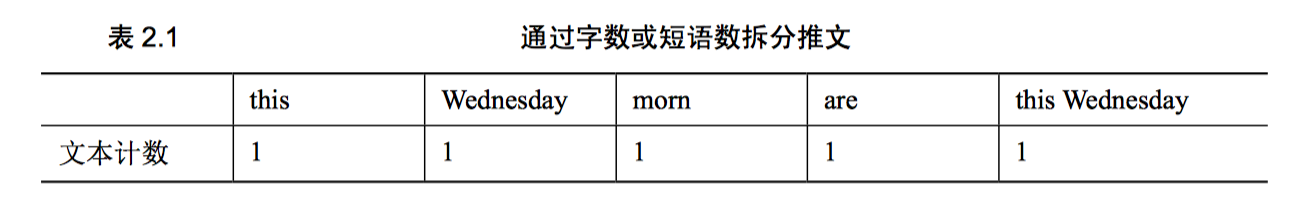

为了进行以上转换，我们使用了`scikit-learn`的`CountVectorizer`方法。

##### 特殊符号
特殊符号，比如问号和感叹号，通常隐含着某种看法，但很难被发现。事实上，问号在以上推文中出现了`1`次，这意味着该推文给读者提出了一个问题。我们可以在刚才的表格中添加一列，如`表2.2`所示：
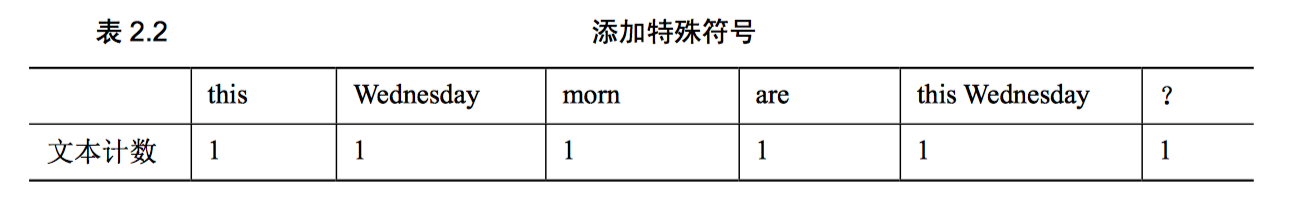

##### 文本相对长度
这条推文有`121`个字符。分析师发现推文的平均长度是`30`个字符。所以，我们可以增加一个叫`相对长度`的新特征，即这条推文是平均推文长度的`4.03`倍，如`表2.3`所示：
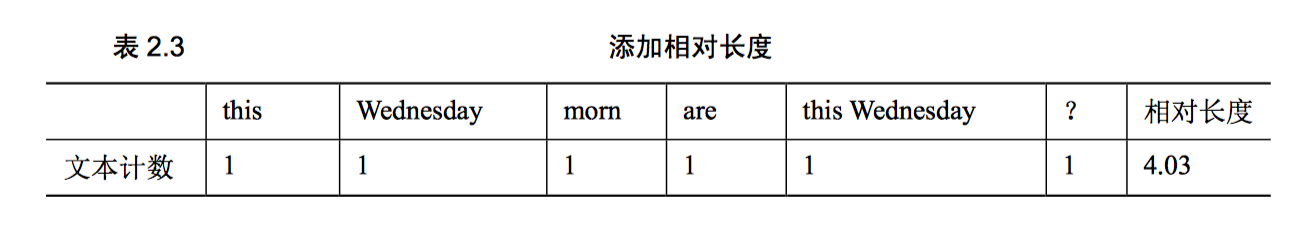

##### 文本主题
我们可以为推文添加相应主题，比如这条推文属于天文学，如`表2.4`所示：
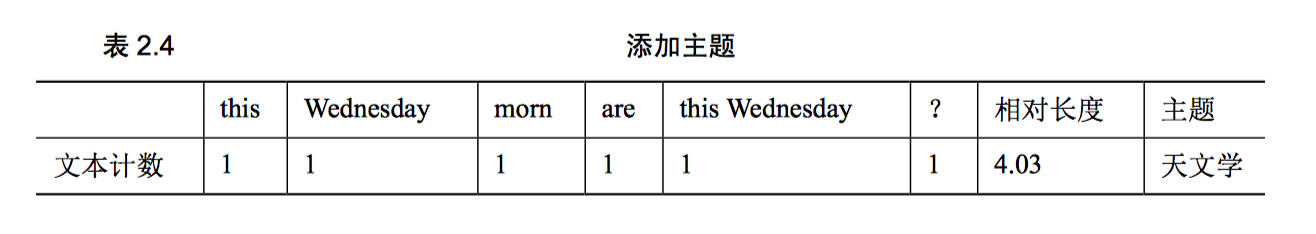

以上我们展示了如何将一段文本转换为结构化、有组织的数据格式，以便进行数据探索和使用模型。

其中，为文本分配主题则是唯一一个无法从原始文本中自动提取的新特征。幸运的是借助更先进的`主题模型`(topic models)， 我们能够从自然语言中提取和预测相关主题。

## 2.4 定量数据和定性数据
定量/定性数据是描述数据集特征最常用的一种方式。

定量数据和定性数据的定义如下：
+ `定量`(quantitative)数据：通常用数字表示，并支持包括加法在内的数学运算
+ `定性`(qualitative)数据：通常用自然类别和文字表示，不支持数字格式和数学运算

### 2.4.1 案例：咖啡店数据
假设我们在分析一家坐落于某大城市的咖啡店数据，数据集有以下5个字段(特征)，我们把它们进行归类：
+ 咖啡店名称：定性数据。咖啡店名称无法用数字表示，且咖啡店名称不能进行数学运算
+ 营业额：定量数据。咖啡店的营业额可以用数字表示，且营业额支持简单的数学运算
+ 邮政编码：定性数据。虽然邮政编码通常用数字表示，但它是定性数据，因为邮政编码不支持数学运算
+ 平均每月客户数：定量数据。该指标可以用数字表示，且支持简单的数学运算—将每个月的平均客户数相加可得到全年的客户数
+ 咖啡产地：定性数据

如果你在区分数据类型时遇到困难，可以先问自己几个简单的问题：
+ 该字段可以用数字表示吗？
    - 如果不可以，该字段是定性数据
    - 如果可以，进入下一个问题
+ 将该字段的多个值相加，得到的新数字有意义吗？
    - 如果没有意义，该字段是定性数据
    - 如果有意义，该字段是定量数据

这个方法应该可以帮助你区分大部分数据的定量/定性属性。

对于定量数据列，可以分析的内容有：
+ 字段平均值是多少？
+ 随着时间推移，字段值是增加还是下降？
+ 是否存在某个阈值，当字段值超过或低于该值时，表示公司在某方面出现了异常

对于定性数据列，可以分析的内容有：
+ 高频值和低频值分别是什么？
+ 字段有多少非重复值？
+ 非重复值分别代表什么？

### 2.4.2 案例：世界酒精消费量
世界卫生组织发布了一个世界各国饮酒习惯的数据集，如下：
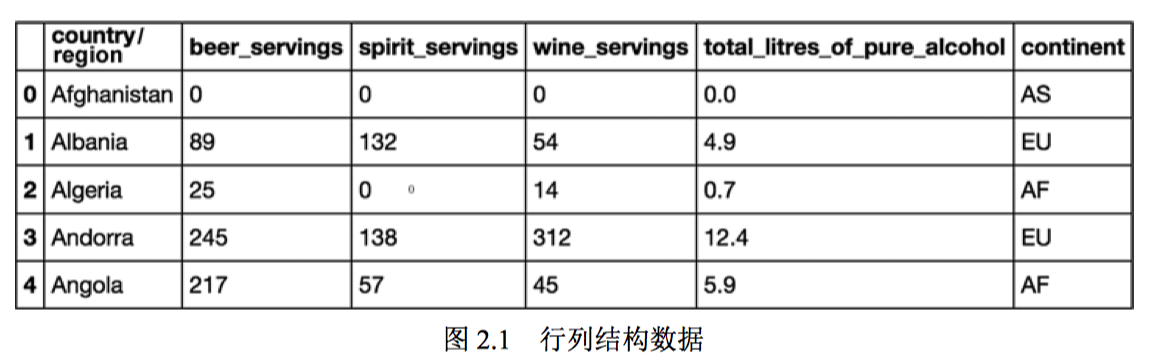

我们有`6`列不同的数据：
+ country/region：定性数据
+ beer_servings：定量数据
+ spirit_servings：定量数据
+ wine_servings：定量数据
+ total_litres_of_pure_alcohol：定量数据
+ continent：定性数据

我们将使用Pandas对该数据集进行分析。

In [2]:
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


首先分析定性数据`continent`列。使用`describe()`方法，该方法首先判断字段的定性/定量属性，然后给出基本统计信息：

In [3]:
drinks['continent'].describe()

count     193
unique      6
top        AF
freq       53
Name: continent, dtype: object

以上结果显示数据来自6个不同的洲，`AF` (非洲)最高频出现了 53 次。

如果我们在定量数据中使用同样的方法，将得到不同的结果：

In [4]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

以上结果显示，这些国家和地区的人均啤酒消费量是`106.2`升，最高的是`376`升。

### 2.4.3 更深入的研究
定量数据还可以继续细分为`离散型`(discrete)数据和`连续型`(continuous)数据：
+ 离散型数据：通常指计数类数据，取值只能是自然数或整数。 比如，掷骰子的点数属于离散型
+ 连续型数据：通常指测量类数据，取值为无限范围区间

## 2.5 简单小结
数据既可以是结构化的，也可以是非结构化的。如果数据是结构化的，我 们可以进一步分析数据集每一列的定量/定性属性。简单地说，分析该列是否是数字格式，是否支持数学运算。

在本章的下半部分，我们将研究数据的`4`个尺度。

## 2.6 数据的 4 个尺度
通常情况下，结构化数据的每一列都可以被归为以下`4`个尺度中的一个：
1. 定类尺度(nominal level)
2. 定序尺度(ordinal level)
3. 定距尺度(interval level)
4. 定比尺度(ratio level)

每个尺度都有适用于自身的测量`数据中心`(the center of the data)的方法。

### 2.6.1 定类尺度
`定类尺度`主要指名称或类别数据，如性别、国籍、种类等。它们无法用数字表示，因此属于定性数据。

作为定性数据，`定类尺度`数据不能进行数学运算。

##### 适用的数学运算
虽然定类尺度数据不支持基本的数学运算，但`等式`和`集合隶属关系`除外。如下所示：
+ `成为科技创业者`等价于`从事科技行业`，反之则不成立
+ `正方形`等价于`长方形`，反之则不成立

##### 测度中心
`测度中心`(measure of center)是一个描述数据趋势的数值，有时也被称为数据`平衡点`(balance point)。常见的测度中心有`平均值`、`中位数`和`模`。

定类尺度数据通常用`模`(mode)作为测度中心。 比如，对于世界卫生组织的酒精消费量数据，出现次数最多的州是`Africa`，因此`Africa`可以作为`continent`列的测度中心。

> 定类尺度数据既不能排序，也无法相加，因此`中位数`和`平均值`不能作为它的测度中心

##### 定类尺度数据有何特征
定类尺度数据通常是用文字表示的自然分类数据。这类数据在翻译成各国文字时，可能会出现缺失，甚至有被拼写错误的情况。

然而，定类尺度数据却非常重要，我们必须仔细思考能够从中得到何种见解。仅仅依靠测度中心—`模`，我们无法得出观测对象平均值的任何结论。这很正常，因为平均值不适用于此类数据！从下一个尺度开始，我们才能对观测数据使用数学运算。

### 2.6.2 定序尺度
`定序尺度`数据则为我们提供了一个等级次序，换言之，提供了一个可以对观测值进行排序的方法。然而，它仍不支持计算两个观测值间的相对差异，即观测值间相加或相减得到的结果仍然没有 意义。

##### 案例
`李克特量表`(Likert)是最常见的定序尺度数据。当我们用`1～10`填写满意度调查问卷时，生成的结果正是定序尺度数据。调查问卷答案必须介于`1～10`，并可以被排序， 比如`8`分比`7`分好。

然而，各个数字之间的差异并没有实际意义。比如`7`分和`6`分的差异是`1`分，`2`分和`1`分的差异也是`1`分，但两个`1`分的含义却可能完全不同。

##### 适用的数学运算
`定序尺度`数据除了继承`定类尺度`的数学运算之外，还支持以下两种数学运算：
+ 排序(ordering)
+ 比较(comparison)

`排序`指数据本身具有的自然顺序，然而有些时候还需要一些技巧。比如对于可见光谱，自然排序规则是随着光的能量和其他属性的增加，从左至右排序，如`图2.2`所示：
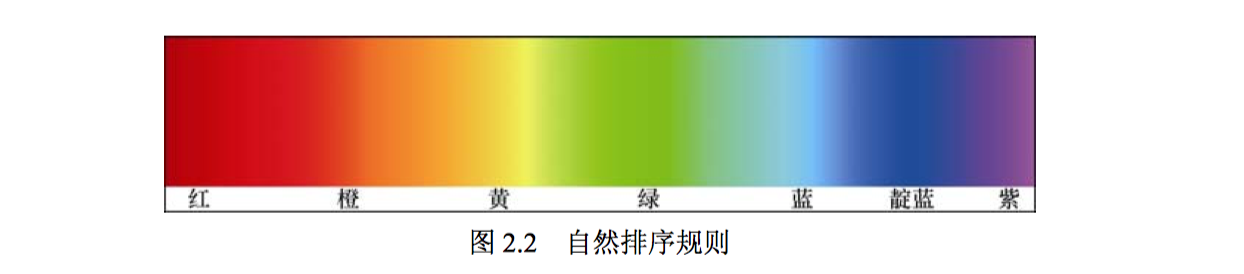

然而，艺术家如果有特殊需求，还可以用另一种排序规则，比如基于颜料用量对上述颜色进行排序。

`比较`是定序尺度数据支持的另一个新运算符。对于定序数据，我们则可以对度量值进行比较，比如调查问卷中的`7`分比`1`分好。

##### 测度中心
`定序尺度`通常用`中位数`，而不是`平均值`表示测度中心， 因为`定序尺度`数据不支持除法。当然，我们也可以使用`定类尺度`中介绍的`模`作为测度中心。

##### 中位数的用法。
以下是一份关于员工满意度的调查问卷结果，问题是用`1～5`分为你当前的工作幸福程度打分：
```
5, 4, 3, 4, 5, 3, 2, 5, 3, 2, 1, 4, 5, 3, 4, 4, 5, 4, 2, 1, 4, 5, 4, 3, 2, 4, 4, 5, 4, 3, 2, 1
```

计算以上数据的中位数：

In [5]:
results = [5, 4, 3, 4, 5, 3, 2, 5, 3, 2, 1, 4, 5, 3, 4, 4, 5, 4, 2, 1, 4, 5, 4, 3, 2, 4, 4, 5, 4, 3, 2, 1]
sorted_results = sorted(results)
print(sorted_results)

[1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]


In [6]:
np.mean(results)

3.4375

In [7]:
np.median(results)

4.0

很多人认为平均值也可以作为测度中心， 这是不正确的，因为两个变量相减或相加得到的值无任何意义，比如`4`分减去`2`分，差异的`2`分没有任何意义，所以数学运算得出的平均值也没有任何意义。`中位数`4.0作为测度中心不仅是合理的，也让调查问卷结果变得更加直观。

### 2.6.3 定距尺度
对于`定距尺度`数据，我们可以用均值和其他更复杂的数学公式描述数据。这是`定类尺度`和`定距尺度`最大的差异，也是唯一的差异。`定距尺度`数据可以进行有意义的减法运算。

##### 案例
温度是最常见的定距尺度数据。假设得克萨斯的温度是`37.78℃`，伊斯坦布尔的温度是`26.67℃`，那么得克萨斯比伊斯坦布尔高`11.11℃`。相对于调查问卷案例，这个例子允许的数学运算显然更多。

##### 适用的数学运算
我们可以使用低一级尺度的所有运算符(排序、比较等)，以及下面两个新运算符：
+ 加法
+ 减法

通过以上两个新运算符，我们可以用全新的视角观察数据。

##### 测度中心
对于`定距尺度`数据，我们依然可以用`中位数`和`模`来表示数据的测度中心， 但更加准确的方法是用`算术平均值`(arithmetic mean)，通常简称为`均值`(mean)。由于`定类`和`定序`尺度数据不支持加法运算，因此`均值`对这两个尺度没有意义。

##### 均值的用法
假设某冰箱保存着制药公司的疫苗，以下是该冰箱每小时的温度值(华氏度)：
```
31, 32, 32, 31, 28, 29, 31, 38, 32, 31, 30, 29, 30, 31, 26
```

计算以上数据的`均值`和`中位数`:

In [8]:
temps = [31, 32, 32, 31, 28, 29, 31, 38, 32, 31, 30, 29, 30, 31, 26]
np.mean(temps) # == 30.73 

30.733333333333334

In [9]:
np.median(temps) # == 31.0

31.0

中位数和平均值非常接近，都在`31℉`左右。然而疫苗的存放标准要求是：
**请勿将疫苗置于`29℉`之下！**

我们注意到冰箱温度有两次低于`29℉`，但你认为这不足以对疫苗产生不利影响。我们使用`变差测度`(measure of variation)判断冰箱状态是否正常。

##### 变差测度
在数据科学中，了解数据分布的广度也同样重要，描述这一现象的度量叫作`变差测度`。

`变差测度`(比如`标准差`)是一个描述数据分散程度的数字。`变差测度`和`测度中心`是描述数据集最重要的两个数字。

##### 标准差
`标准差`是定距尺度和更高尺度数据中应用最为广泛的变差测度。`标准差`可以被理解为`数据点到均值点的平均距离`。虽然这一描述在技术上和数学定义上都不严谨，但却有助于我们理解标准差的含义。

计算标准差的公式可以被拆分为以下步骤：
1. 计算数据的均值
2. 计算数据集中的每一个值和均值的差，并将其平方
3. 计算第2步的平均值，得到方差
4. 对第3步得到的值开平方，得到标准差

注意，以上每一步计算的均值都是`算术平均值`。

计算温度数据集的标准差:

In [10]:
temps = [31, 32, 32, 31, 28, 29, 31, 38, 32, 31, 30, 29, 30, 31, 26] 
mean = np.mean(temps) 

squared_differences = []
for temperature in temps:
    difference = temperature - mean
    squared_difference = difference**2
    squared_differences.append(squared_difference)
    # This number is also called the "Variance"
    average_squared_difference = np.mean(squared_differences)
    
standard_deviation = np.sqrt(average_squared_difference)
standard_deviation

2.5157283018817607

我们计算出数据集的标准差是`2.5`左右。这意味着平均来看，每一个数据点和平均温度`31℉`之间的距离是`2.5℉`。因此，冰箱温度在未来将下降至`29℉`以下。

计算标准差时，没有直接使用数据点和平均值的差，而是将差值平方后使用。这样做是为了突出`离群值`(outliers)，即那些明显远离平均值的数据点。

`变差度量`非常清晰地描述了数据的离散程度。当我们需要关心数据范围和波动情况时，这一指标显得尤为重要。

`定距尺度`和下一尺度之间的区别并不是十分明显。`定距尺度`数据没有自然的起始点或者自然的零点。比如，零摄氏度并不意味着没有温度。

### 2.6.4 定比尺度
`定比尺度`支持的数学运算在4个尺度中最全面。 除了排序和减法之外，定比尺度支持使用乘法和除法。听起来仿佛没必要小题大做，但这却彻底改变了我们观察此类数据的方法。

##### 案例
由于华氏度缺少自然零点，因此属于`定距尺度`。 `开氏温标`却自豪地拥有`自然零点`。开氏温标为0时意味着没有任何热量，我们可以有科学依据地说200开氏温度是100开氏温度的两倍。

> 一些人认为华氏度和摄氏度同样有自然零点，原因是开氏温标可以转换为华氏度和摄氏度。然而，由于转换后的华氏度和摄氏度会出现负数，所以并不存在自然零点。

##### 测度中心
算术平均值对定比尺度仍然有效，同时还增加一种叫`几何平均值`(geometric mean)的新均值类型。后者在定比类型中并不经常使用，但仍然值得提及，它是指$n$个观察值连乘积的$n$次方根。

比如，计算冰箱温度数据几何平均值：

In [11]:
temps = [31, 32, 32, 31, 28, 29, 31, 38, 32, 31, 30, 29, 30, 31, 26] 

num_items = len(temps) 
product = 1.

for temperature in temps:
    product *= temperature 
    geometric_mean = product**(1./num_items) 
    
geometric_mean # == 30.634

30.63473484374659

几何平均值非常接近之前计算的算术平均值和中位数。但是请记住，这种情况并不经常发生。

##### 定比尺度的几个问题
`定比尺度`存在一个重要前提，导致`定比尺度`的适用范围受到限制。这个基本前提是：
+ 定比尺度数据通常是非负数

试想如果我们允许负数的存在，那么一些比率很可能丧失含义。

## 2.7 数据是旁观者的眼睛
我们可以人为地改变数据结构。比如虽然理论上不能计算定序尺度数据`1～5`的平均值，但这并不能妨碍一些统计学家用它观察数据集。

数据归属的层次必须在开始分析之前确定好。如果用算术平均值和标准差等工具分析定序数据，作为数据科学家，你就必须意识到潜在的风险。因为如果继续把这个错误的假设作为分析的基础依据，就将遇到很多问题。比如，错误的假设定序数据具有整除性。

### 2.8 总结
正确理解数据类型是数据科学最重要的组成部分。这一步必须在数据分析开始之前进行，因为数据类型决定了可使用的分析方法。 任何时候拿到一个新的数据集，你需要首先回答的3个问题是：
+ 数据是有组织格式，还是无组织格式
+ 每一列是定量数据，还是定性数据
+ 每一列属于什么尺度

以上问题的答案不仅影响着你对数据的理解，还将决定下一步的分析步骤。它们决定了可以使用的图形类型，以及如何使用数据模型。有时候，为了得到更多的信息，我们必须将数据由一种类型转换为另一种类型。在接下来的章节，我们将学习如何处理和分析不同类型的数据。